In [1]:
# downoading and loading the data
import kagglehub
import shutil
import pandas as pd
import os

#download the data
mlg_ulb_creditcardfraud_path = kagglehub.dataset_download('mlg-ulb/creditcardfraud')
print('Data source import complete.')

#load the data
df = pd.read_csv(mlg_ulb_creditcardfraud_path + '/creditcard.csv')
df.head(5)

Data source import complete.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
#checking null values
df.isnull().sum().sum()

np.int64(0)

In [4]:
# checking the class distribution = {1:Normal,0:Fraud}
df['Class'].value_counts()

,count
Class,
0,284315
1,492


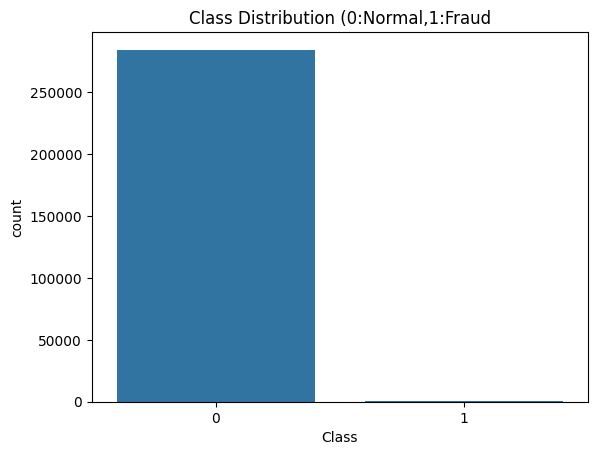

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Class',data = df)
plt.title("Class Distribution (0:Normal,1:Fraud")
plt.show()

In [6]:
#check duplicates
df.duplicated().sum()

np.int64(1081)

So we got to drop these duplicates and again check the distribution.

In [7]:
df.drop_duplicates(inplace=True)
df['Class'].value_counts()

,count
Class,
0,283253
1,473


In [8]:
#converting time
df['Time'] = pd.to_datetime(df['Time'],unit = 's')
df['Time'].head(5)

,Time
0,1970-01-01 00:00:00
1,1970-01-01 00:00:00
2,1970-01-01 00:00:01
3,1970-01-01 00:00:01
4,1970-01-01 00:00:02


In [9]:
# creating new features
df['day'] = df['Time'].dt.day
df['hour'] = df['Time'].dt.hour
df['min'] = df['Time'].dt.minute

In [10]:
# dropping the Time column
df.drop(columns=['Time'],axis=1,inplace=True)
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Amount,Class,day,hour,min
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1,0,0


Let us take a look at the 32 columns now

In [11]:
# Creating the input feature matrix and target vector
X = df.drop(columns=['Class']).copy()
y = df['Class']
X.shape,y.shape

((283726, 32), (283726,))

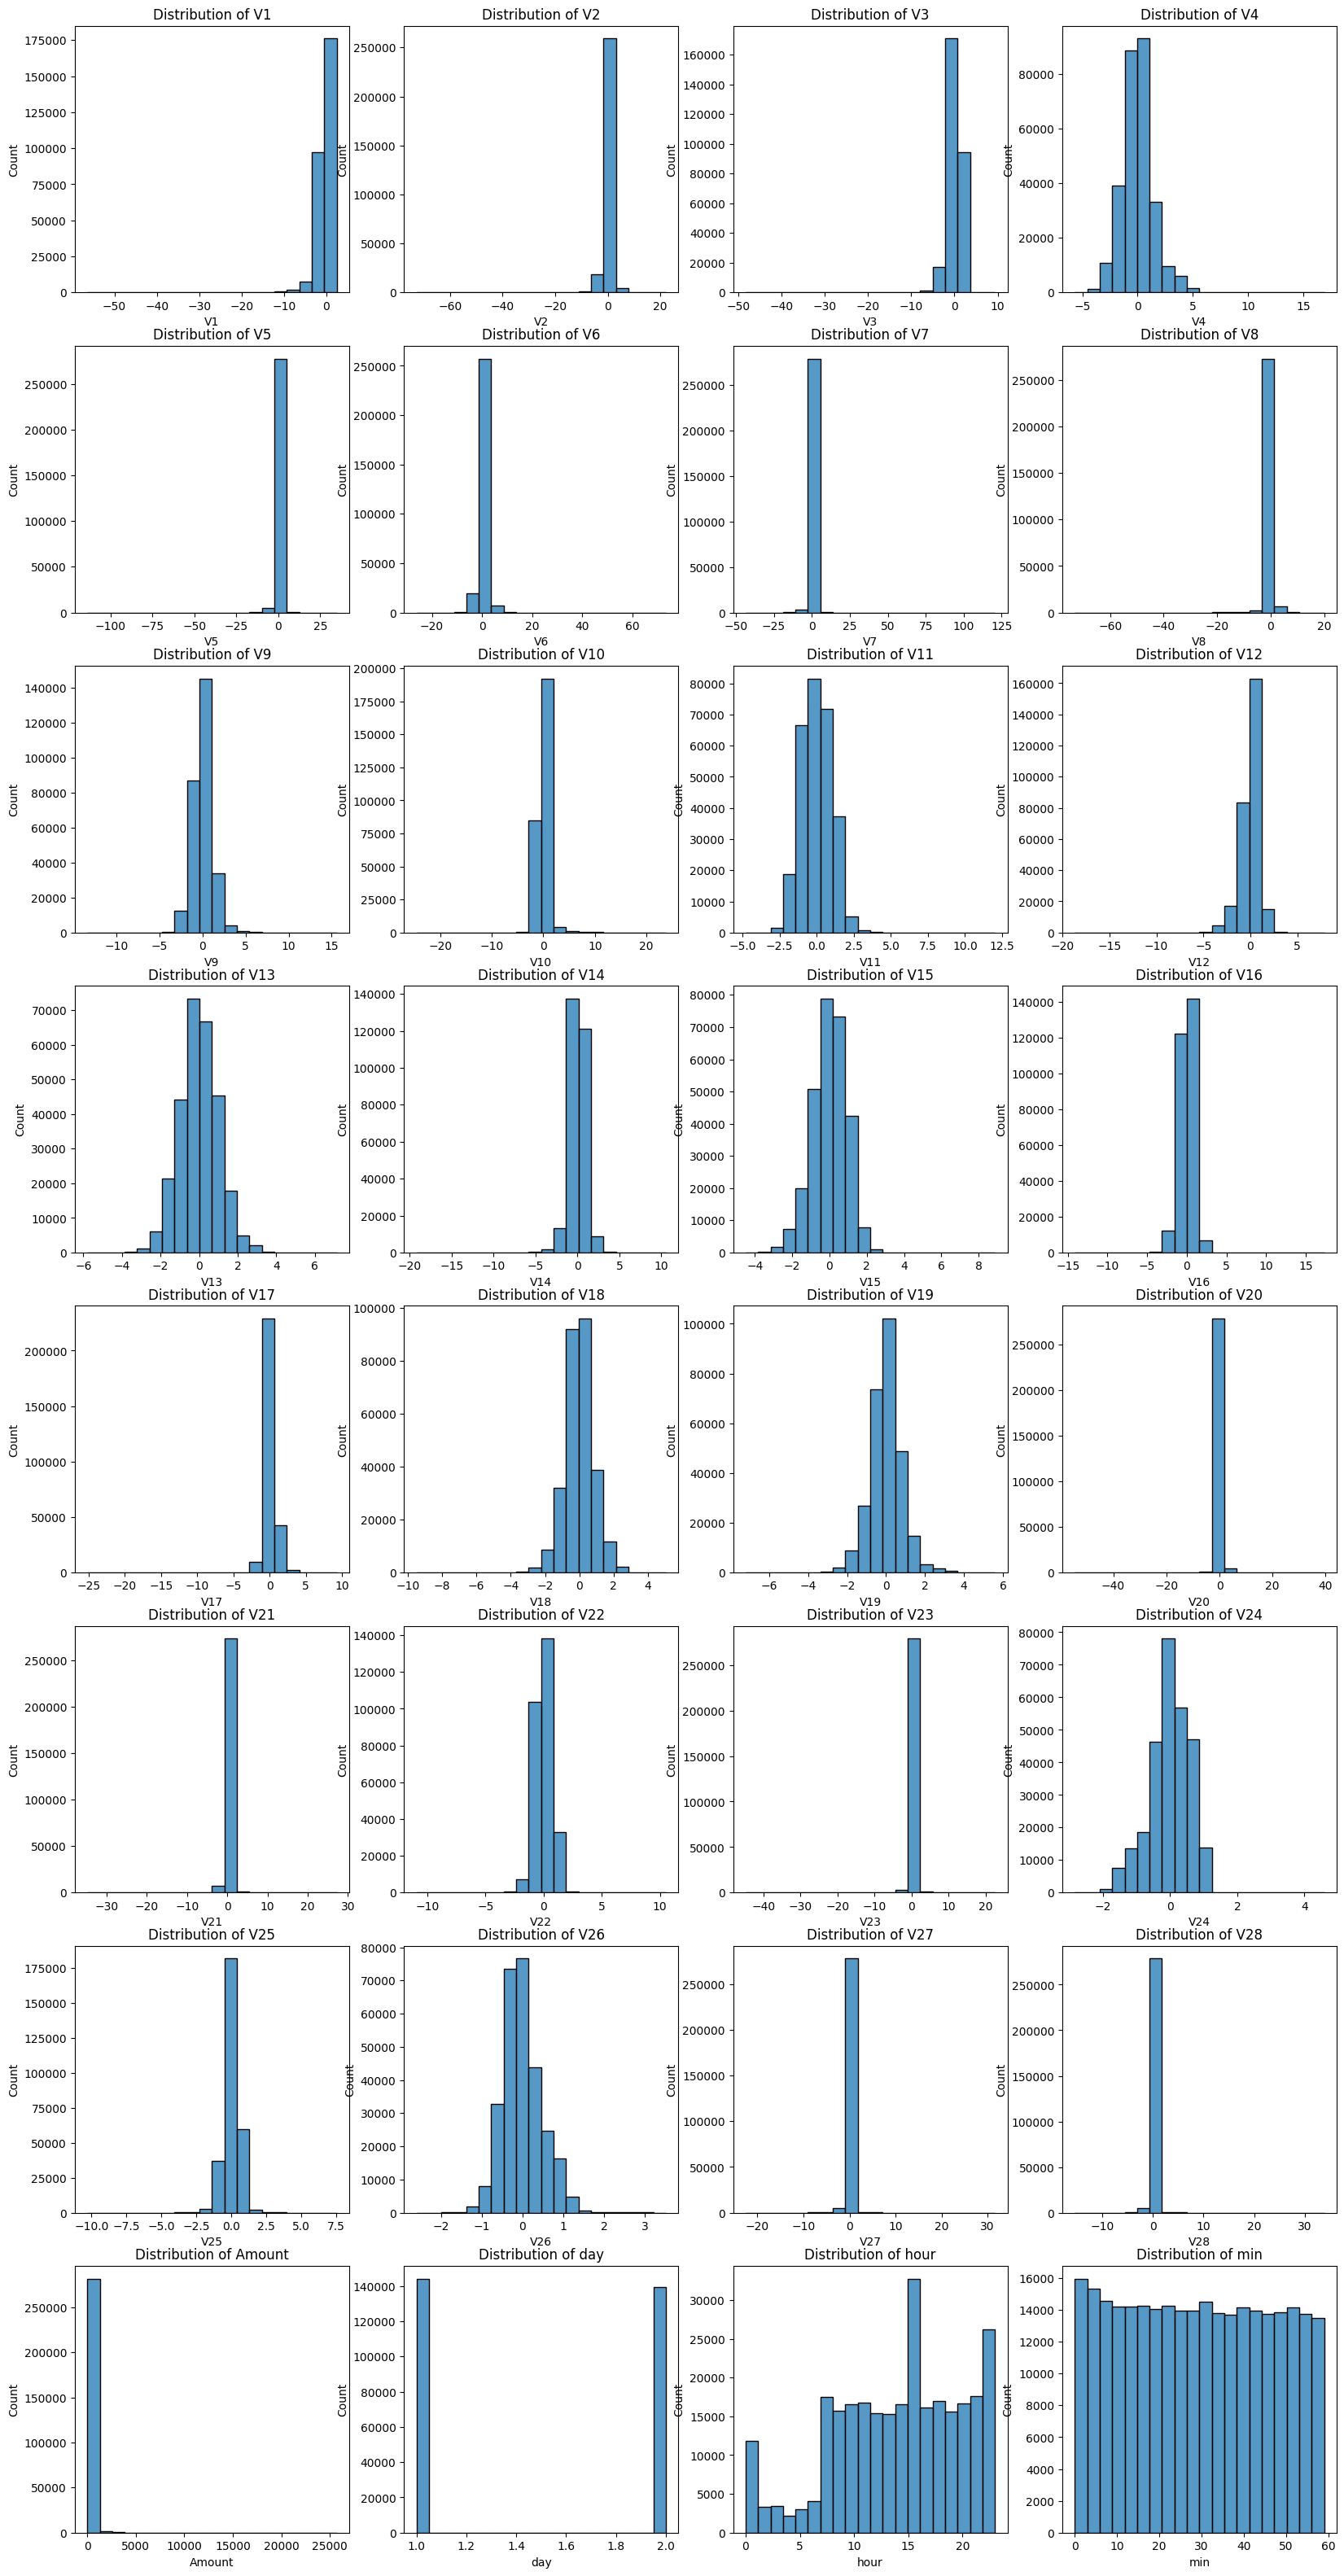

In [12]:
#histplots
plt.figure(figsize=(20,40))
for col in X.columns:
    plt.subplot(8,4,X.columns.get_loc(col)+1)
    sns.histplot(data=X,x=col,bins=20)
    plt.title(f"Distribution of {col}")

plt.show();

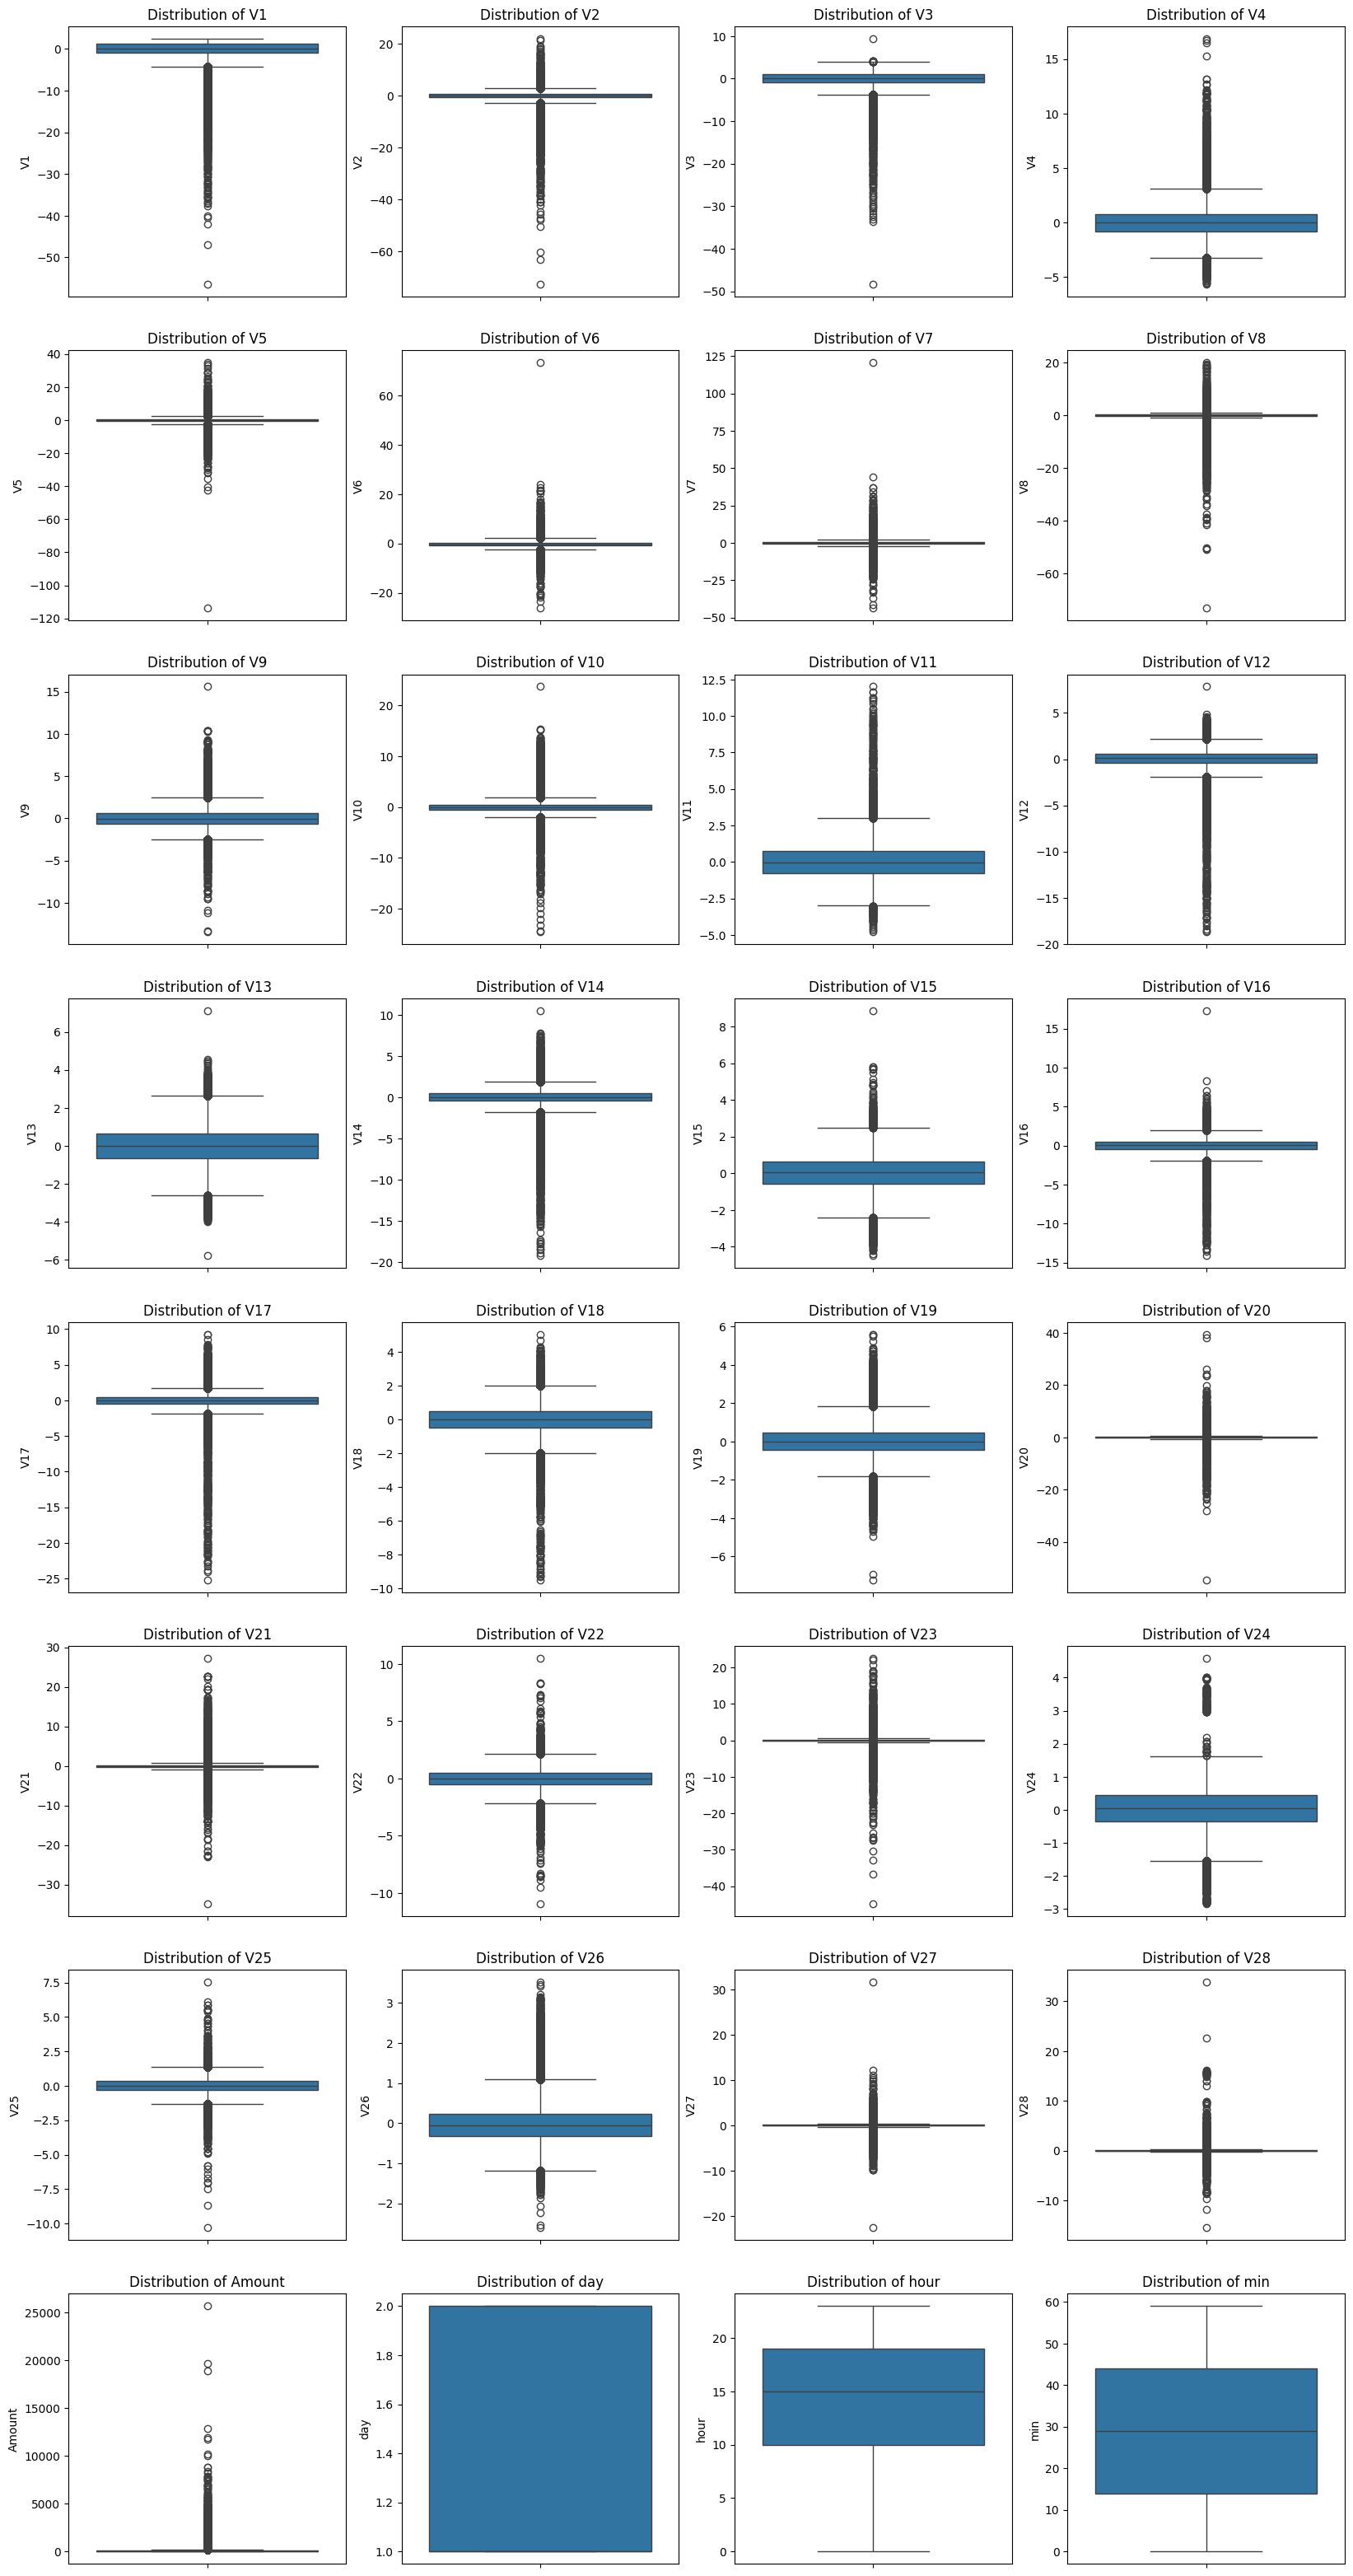

In [13]:
# boxplots
plt.figure(figsize=(20,40))
for col in X.columns:
    plt.subplot(8,4,X.columns.get_loc(col)+1)
    sns.boxplot(data=X,y=col)
    plt.title(f"Distribution of {col}")

plt.show();

In [14]:
# Checking outliers
def outliers(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  IQR = q3-q1
  lower_bound = q1 - (1.5*IQR)
  upper_bound = q3 + (1.5*IQR)

  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

  print('='*20)
  print(f"Feature: {col}")
  print(f"Total number of outliers: {len(outliers)}")
  if len(outliers) == 0:
    print("No fraud cases in outliers")
  else:
    print(f"Fraud cases in outliers: {len(outliers[outliers['Class']==1])}")
    print(f"percentage fraud cases that are outliers: {len(outliers[outliers['Class'] == 1])*100/len(df[df['Class']==1]):.2f} %")
  print("="*20)

for col in X.columns:
  outliers(df,col)

Feature: V1
Total number of outliers: 6948
Fraud cases in outliers: 158
percentage fraud cases that are outliers: 33.40 %
Feature: V2
Total number of outliers: 13390
Fraud cases in outliers: 230
percentage fraud cases that are outliers: 48.63 %
Feature: V3
Total number of outliers: 3306
Fraud cases in outliers: 293
percentage fraud cases that are outliers: 61.95 %
Feature: V4
Total number of outliers: 11094
Fraud cases in outliers: 300
percentage fraud cases that are outliers: 63.42 %
Feature: V5
Total number of outliers: 12221
Fraud cases in outliers: 191
percentage fraud cases that are outliers: 40.38 %
Feature: V6
Total number of outliers: 22886
Fraud cases in outliers: 125
percentage fraud cases that are outliers: 26.43 %
Feature: V7
Total number of outliers: 8839
Fraud cases in outliers: 283
percentage fraud cases that are outliers: 59.83 %
Feature: V8
Total number of outliers: 23904
Fraud cases in outliers: 230
percentage fraud cases that are outliers: 48.63 %
Feature: V9
Total n

Given the high percentage of outliers, it won't be wise to remove them as they might carry hidden patterns with them. <br>
So let us just scale them accordingly.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = y)

In [17]:
# Scaling and converting back to DataFrame
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled_array,
                             columns=X_train.columns,
                             index=X_train.index)

X_test_scaled_array = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_array,
                            columns=X_test.columns,
                            index=X_test.index)

In [18]:
X_train = X_train_scaled
X_test = X_test_scaled

In [19]:
print(f"training set: {X_train.shape}")
print(f"test set: {X_test.shape}")
print(f"Fraud rate in train: {y_train.mean():.4f}")
print(f"Fraud rate in test: {y_test.mean():.4f}")

training set: (226980, 32)
test set: (56746, 32)
Fraud rate in train: 0.0017
Fraud rate in test: 0.0017


- Our goal is to maximise the recall i.e. catch as many true positives as possible without sacrificing the precision(low false positives).
- This is beacause missing any true positive(fraud) can result in catastropic monetary losses.
- And also having too many false positives means,inconvenience to non-fradulent users and load on manual checking mechanism.
the available dataset is highly imbalanced,less than 1% data entries are fraud.
- We plan to use cost-sensitive learning by:
    - including the imbalance in the data during training.
    - using threshold tuning for finding the best threshold(default = 0.5)
- The metrics most important to us will be recall,precision and F2_score. As you can see accuracy doesn't matter at all, a dumb model classifying each entire test data as class "negative" will also yield a 99% accuracy.
- We will first use cross-validation on a set of vanilla models to check who are our top performers. Adn will pick up the best 5 models for further consideration.
- After that we gonna use two approches basically to find the best model:
    1. Sequential optimisation
    2. simultaneous hyperparameter and threshold tuning
- We will be using Optuna for hyper-parameter tuning and TunedThresholdClassifierCV for threshold tuning.
- Following models will be used.
    - LightGBM
    - XGBoost
    - CatBoost
    - RandomForest
    - LogisticRegression
    - DecisionTrees
    - NaiveBayes
    - AdaBoost

In [20]:
!pip install optuna
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00


In [21]:
# making relevant imports
import time
import numpy as np
import optuna
from sklearn.model_selection import StratifiedKFold,cross_val_predict,cross_validate,TunedThresholdClassifierCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,fbeta_score,classification_report,confusion_matrix,make_scorer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


## Vanilla Model Comparison using Cross Validation

We will use a list of vanilla models and train them using cross validation here.

In [22]:
import torch
print(f"CUDA available : {torch.cuda.is_available()}")
print(f"GPU device : {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU'}")

CUDA available : True
GPU device : Tesla T4


In [23]:
# Optuna optimization
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [24]:
""" Define the Vanilla Models """
# Calculate class weight for imbalanced dataset (cost-sensitive learning)
pos_weight = len(y_train[y_train==0])/len(y_train[y_train==1])

vanilla_models = {
    'CatBoost': CatBoostClassifier(
        random_state=42,
        class_weights=[1, pos_weight],
        task_type='GPU',
        devices='0',
        verbose=0
    ),
    'LightGBM': LGBMClassifier(
        random_state=42,
        class_weight='balanced',
        device='gpu',
        n_jobs=-1,
        verbose=-1
    ),
    'XGBoost': XGBClassifier(
        random_state=42,
        scale_pos_weight=pos_weight,
        tree_method='hist',
        device='cuda',
        n_jobs=-1,
        verbosity=0
    ),
    'RandomForest': RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    'LogisticRegression': LogisticRegression(
        random_state=42,
        class_weight='balanced',
        max_iter=1000,
        n_jobs=-1
    ),
    'DecisionTree': DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ),
    'NaiveBayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(
        random_state=42
    )
}


In [25]:
# custom scorer with beta=2
fbeta_2_scorer = make_scorer(fbeta_score, beta=2)

# Scoring dictionary for vanilla models
Scoring_vanilla_models = {
    'accuracy' : 'accuracy',
    'precision' : 'precision',
    'recall' : 'recall',
    'f1' : 'f1',
    'f2' : fbeta_2_scorer
}

In [26]:
def evaluate_vanilla_models_with_metrics_df(X, y, models):
    print("=" * 60)
    print("VANILLA MODEL EVALUATION (Full Metrics as DataFrame)")
    print("=" * 60)

    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    records = []

    for name, model in models.items():
        print(f"\nEvaluating {name}...")

        try:
            scores = cross_validate(
                model, X, y, cv=cv,
                scoring=Scoring_vanilla_models,
                return_train_score=True,
                n_jobs=-1
            )

            for metric in Scoring_vanilla_models:
                for dataset in ['train', 'test']:
                    key = f"{dataset}_{metric}"
                    mean = scores[key].mean()
                    std = scores[key].std()

                    records.append({
                        'model': name,
                        'metric': metric,
                        'dataset': dataset,
                        'mean': mean,
                        'std': std
                    })

                # Print just the test F2 for logging
                if metric == 'recall':
                    print(f"  recall-score (test): {scores['test_recall'].mean():.4f} ± {scores['test_recall'].std():.4f}")

        except Exception as e:
            print(f"  Error evaluating {name}: {e}")
            continue

    df_results = pd.DataFrame(records)

    # Filter only test F2-scores for ranking
    df_recall = df_results[(df_results['metric'] == 'recall') & (df_results['dataset'] == 'test')].dropna()
    df_recall_sorted = df_recall.sort_values(by='mean', ascending=False)

    print("\n" + "=" * 60)
    print("MODEL RANKINGS (by Test recall-score)")
    print("=" * 60)
    for i, row in enumerate(df_recall_sorted.itertuples(), 1):
        print(f"{i:2d}. {row.model:15s}: F2 = {row.mean:.4f} ± {row.std:.4f}")

    # Plot recall train vs test
    df_plot = df_results[df_results['metric'] == 'recall']
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_plot, x='model', y='mean', hue='dataset', errorbar=None)
    plt.title("Train vs Test recall-Score per Model")
    plt.ylabel("recall-score")
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.legend(title="Dataset")
    plt.tight_layout()
    plt.show()

    # Get top 5 model names by F2
    top_models = df_recall_sorted['model'].tolist()[:5]
    print(f"\nSelected top 5 models for hyperparameter tuning: {top_models}")

    return df_results, top_models


VANILLA MODEL EVALUATION (Full Metrics as DataFrame)

Evaluating CatBoost...
  recall-score (test): 0.8360 ± 0.0262

Evaluating LightGBM...
  recall-score (test): 0.8228 ± 0.0357

Evaluating XGBoost...


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


  recall-score (test): 0.8201 ± 0.0320

Evaluating RandomForest...
  recall-score (test): 0.7381 ± 0.0686

Evaluating LogisticRegression...
  recall-score (test): 0.9127 ± 0.0224

Evaluating DecisionTree...
  recall-score (test): 0.7011 ± 0.0656

Evaluating NaiveBayes...
  recall-score (test): 0.8254 ± 0.0449

Evaluating AdaBoost...
  recall-score (test): 0.6720 ± 0.0326

MODEL RANKINGS (by Test recall-score)
 1. LogisticRegression: F2 = 0.9127 ± 0.0224
 2. CatBoost       : F2 = 0.8360 ± 0.0262
 3. NaiveBayes     : F2 = 0.8254 ± 0.0449
 4. LightGBM       : F2 = 0.8228 ± 0.0357
 5. XGBoost        : F2 = 0.8201 ± 0.0320
 6. RandomForest   : F2 = 0.7381 ± 0.0686
 7. DecisionTree   : F2 = 0.7011 ± 0.0656
 8. AdaBoost       : F2 = 0.6720 ± 0.0326


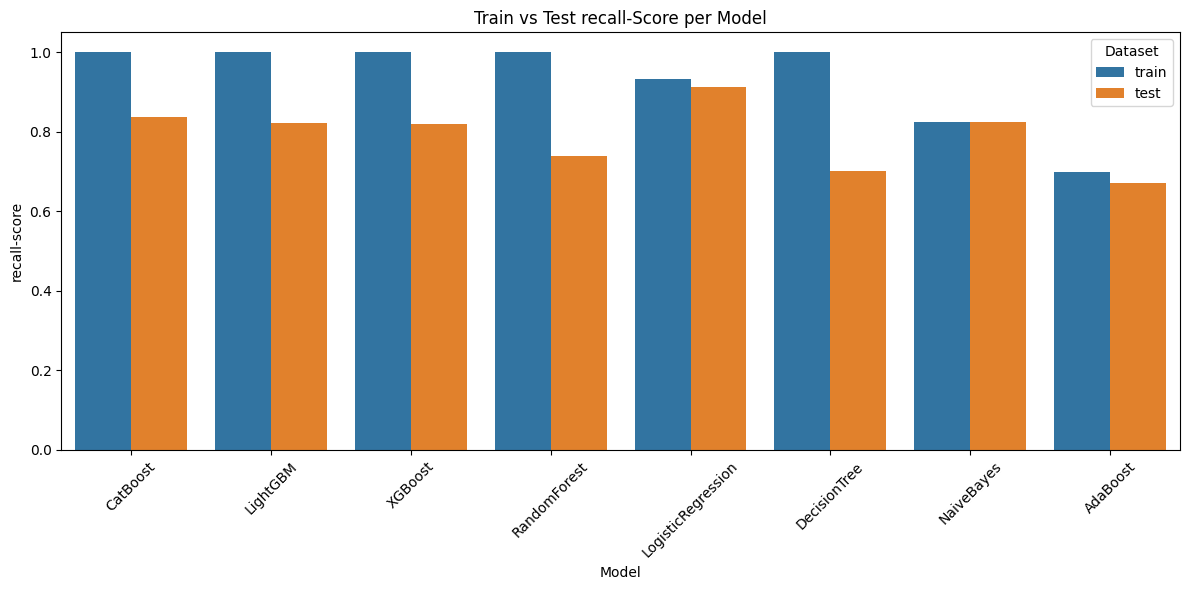


Selected top 5 models for hyperparameter tuning: ['LogisticRegression', 'CatBoost', 'NaiveBayes', 'LightGBM', 'XGBoost']


In [27]:
df_scores, top_models = evaluate_vanilla_models_with_metrics_df(X_train, y_train, vanilla_models)


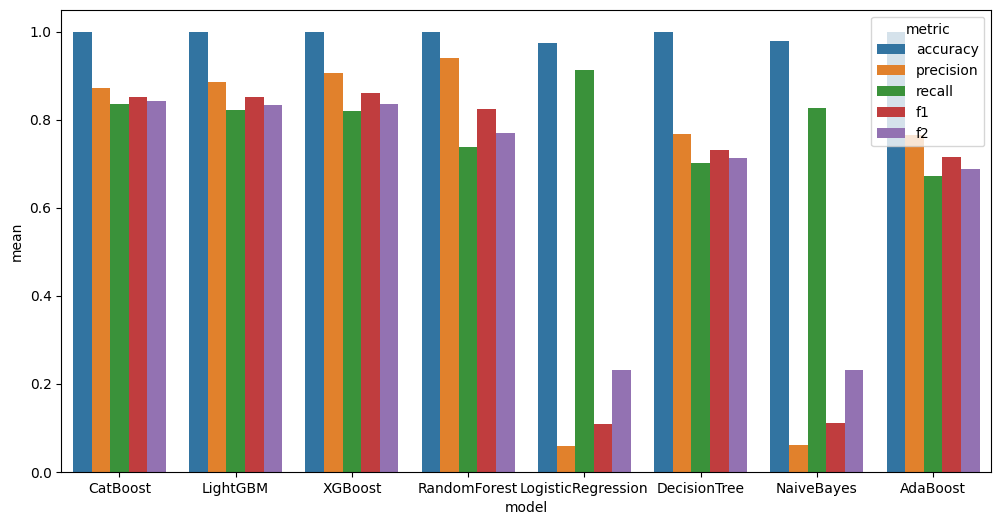

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_scores[df_scores['dataset'] == 'test'], x='model', y='mean', hue='metric');


In [29]:
df_scores[df_scores['metric'] == 'recall']

,model,metric,dataset,mean,std
4,CatBoost,recall,train,1.000000,0.000000
5,CatBoost,recall,test,0.835979,0.026189
14,LightGBM,recall,train,1.000000,0.000000
15,LightGBM,recall,test,0.822751,0.035690
24,XGBoost,recall,train,1.000000,0.000000
25,XGBoost,recall,test,0.820106,0.031966
34,RandomForest,recall,train,1.000000,0.000000
35,RandomForest,recall,test,0.738095,0.068579
44,LogisticRegression,recall,train,0.932540,0.009720
45,LogisticRegression,recall,test,0.912698,0.022448


In [30]:
top_models

['LogisticRegression', 'CatBoost', 'NaiveBayes', 'LightGBM', 'XGBoost']

Now we will perform hyperparameter tuning for these models. <br>
There are two approaches that we can follow:
- Sequential
- Simulatneous hyperparameter tuning and threshold tuning


Approach 1: Sequential:hyperparameter tuning with recall and then threshold tuning with cost_function

In [ ]:
# create copy of the vanilla models
from copy import deepcopy
approach1_vanilla_models = deepcopy(vanilla_models)
approach1_vanilla_models

{'CatBoost': <catboost.core.CatBoostClassifier at 0x79ac629de7d0>,
 'LightGBM': LGBMClassifier(class_weight='balanced', device='gpu', n_jobs=-1,
                random_state=42, verbose=-1),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cuda', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, random_state=42, ...),
 'RandomForest': RandomForestC

In [ ]:
approach1_vanilla_models['LightGBM'] is vanilla_models['LightGBM']


False

In [ ]:
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, zero_division=0)

# scoring dictionary
scoring_dict = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, zero_division=0),
    'recall': make_scorer(recall_score, zero_division=0),
    'f1': make_scorer(f1_score, zero_division=0),
    'f2': make_scorer(f2_score)
}

In [ ]:
def create_optuna_objective(model_name, X_train, y_train, X_val, y_val, pos_weight):
    """Create Optuna objective function for a given model"""

    def objective(trial):
        if model_name == 'LightGBM':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 15),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'num_leaves': trial.suggest_int('num_leaves', 10, 300),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'class_weight': 'balanced',
                'random_state': 42,
                'n_jobs': -1,
                'verbose': -1,
                'device': 'gpu'
            }
            model = LGBMClassifier(**params)

        elif model_name == 'XGBoost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                'scale_pos_weight': pos_weight,
                'random_state': 42,
                'n_jobs': -1,
                'verbosity': 0,
                'tree_method': 'hist',
                'device': 'cuda'
            }
            model = XGBClassifier(**params)

        elif model_name == 'CatBoost':
            params = {
                'iterations': trial.suggest_int('iterations', 50, 300),
                'depth': trial.suggest_int('depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
                'border_count': trial.suggest_int('border_count', 32, 255),
                'class_weights': [1, pos_weight],
                'random_state': 42,
                'verbose': 0,
                'task_type': 'GPU',
                'devices': '0'
            }
            model = CatBoostClassifier(**params)

        elif model_name == 'RandomForest':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 200),
                'max_depth': trial.suggest_int('max_depth', 5, 25),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                'class_weight': 'balanced',
                'random_state': 42,
                'n_jobs': -1
            }
            model = RandomForestClassifier(**params)

        elif model_name == 'LogisticRegression':
            params = {
                'C': trial.suggest_float('C', 0.01, 10.0, log=True),
                'penalty': trial.suggest_categorical('penalty', ['l2']),
                'solver': 'liblinear',
                'class_weight': 'balanced',
                'max_iter': 500,
                'random_state': 42
            }
            model = LogisticRegression(**params)

        elif model_name == 'DecisionTree':
            params = {
                'max_depth': trial.suggest_int('max_depth', 3, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                'class_weight': 'balanced',
                'random_state': 42
            }
            model = DecisionTreeClassifier(**params)

        elif model_name == 'AdaBoost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 10, 100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 2.0),
                'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),
                'random_state': 42
            }
            model = AdaBoostClassifier(**params)

        else:  # Naive Bayes
            model = GaussianNB()

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        score = recall_score(y_val, y_pred, zero_division=0)
        return score

    return objective


In [ ]:
def optimize_hyperparameters(model_name, X, y, n_trials=50):
    """Optimize hyperparameters using Optuna"""
    print(f"\nOptimizing {model_name} with Optuna ({n_trials} trials)...")

    # Split for inner validation
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    # Compute class imbalance ratio
    from collections import Counter
    counter = Counter(y_train)
    neg, pos = counter[0], counter[1]
    pos_weight = neg / pos

    # Create and optimize study
    study = optuna.create_study(direction='maximize')
    objective = create_optuna_objective(model_name, X_train, y_train, X_val, y_val, pos_weight)
    study.optimize(objective, n_trials=n_trials)


    return study.best_params, study.best_value


In [ ]:
for model_name in top_models:
    print(approach1_vanilla_models[model_name])

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42)
GaussianNB()
LGBMClassifier(class_weight='balanced', device='gpu', n_jobs=-1,
               random_state=42, verbose=-1)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)


In [ ]:
import time
from datetime import datetime

print(f"\n{'='*80}")
print("HYPERPARAMETER OPTIMIZATION (OPTUNA)")
print(f"{'='*80}")

optimized_models = {}
total_start_time = time.time()

for model_name in top_models:
    print(f"\nOptimizing {model_name}...")
    model_start_time = time.time()

    try:
        best_params, best_score = optimize_hyperparameters(
            model_name, X_train, y_train, n_trials=30  # Reduced for speed
        )

        # Create optimized model - get from vanilla_models dictionary
        base_model = approach1_vanilla_models[model_name]
        optimized_model = base_model.set_params(**best_params)

        model_end_time = time.time()
        model_duration = model_end_time - model_start_time

        optimized_models[model_name] = {
            'model': optimized_model,
            'params': best_params,
            'score': best_score,
            'optimization_time': model_duration
        }

        print(f" {model_name} optimization completed in {model_duration:.2f} seconds")
        print(f"  Best score: {best_score:.4f}")
        print(f"  Best params: {best_params}")

    except Exception as e:
        model_end_time = time.time()
        model_duration = model_end_time - model_start_time

        print(f" Error optimizing {model_name}: {e}")
        print(f"  Using vanilla model as fallback (took {model_duration:.2f} seconds)")

        # Use vanilla model as fallback
        optimized_models[model_name] = {
            'model': approach1_vanilla_models[model_name],
            'params': {},
            'score': None,  # We don't have a score for failed optimization
            'optimization_time': model_duration
        }

total_end_time = time.time()
total_duration = total_end_time - total_start_time

print(f"\n{'='*80}")
print("OPTIMIZATION SUMMARY")
print(f"{'='*80}")
print(f"Total optimization time: {total_duration:.2f} seconds ({total_duration/60:.2f} minutes)")
print(f"Successfully optimized: {len([m for m in optimized_models.values() if m['score'] is not None])}/{len(top_models)} models")

# Display timing breakdown
print(f"\nTiming breakdown:")
for model_name, model_info in optimized_models.items():
    print(f"  {model_name}: {model_info['optimization_time']:.2f}s")

print(f"\nOptimized models ready for evaluation!")


HYPERPARAMETER OPTIMIZATION (OPTUNA)

Optimizing LogisticRegression...

Optimizing LogisticRegression with Optuna (30 trials)...
 LogisticRegression optimization completed in 98.54 seconds
  Best score: 0.8947
  Best params: {'C': 0.02034060256705875, 'penalty': 'l2'}

Optimizing CatBoost...

Optimizing CatBoost with Optuna (30 trials)...
 CatBoost optimization completed in 78.03 seconds
  Best score: 0.8947
  Best params: {'iterations': 261, 'depth': 4, 'learning_rate': 0.04108652897056359, 'l2_leaf_reg': 6.251650123594416, 'border_count': 149}

Optimizing NaiveBayes...

Optimizing NaiveBayes with Optuna (30 trials)...
 NaiveBayes optimization completed in 4.12 seconds
  Best score: 0.8684
  Best params: {}

Optimizing LightGBM...

Optimizing LightGBM with Optuna (30 trials)...
 LightGBM optimization completed in 110.30 seconds
  Best score: 0.8947
  Best params: {'n_estimators': 129, 'max_depth': 3, 'learning_rate': 0.093900068766539, 'num_leaves': 88, 'min_child_samples': 44, 'subs

In [ ]:
hp_tuned_model_dict = {name: details['model'] for name,details in optimized_models.items()}
hp_tuned_model_dict

{'LogisticRegression': LogisticRegression(C=0.02034060256705875, class_weight='balanced',
                    max_iter=1000, n_jobs=-1, random_state=42),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x79ac90167590>,
 'NaiveBayes': GaussianNB(),
 'LightGBM': LGBMClassifier(class_weight='balanced', colsample_bytree=0.6076239857664311,
                device='gpu', learning_rate=0.093900068766539, max_depth=3,
                min_child_samples=44, n_estimators=129, n_jobs=-1, num_leaves=88,
                random_state=42, subsample=0.8224348719456899, verbose=-1),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.558103262127884, device='cuda',
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constrain

In [31]:
from sklearn.metrics import confusion_matrix, make_scorer

def fraud_cost_function(y_true, y_pred):
    """
    Custom cost function for credit card fraud detection.
    High penalty for False Negatives, moderate penalty for False Positives.
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Define costs
    cost_fn = 100
    cost_fp = 10

    total_cost = fn * cost_fn + fp * cost_fp

    return -total_cost  # We negate because higher is better in scikit-learn scoring

# Wrap into a scorer for model selection or threshold tuning
cost_scorer = make_scorer(fraud_cost_function, greater_is_better=True)

In [ ]:
def threshold_tuning(X_train, y_train, model, model_name, cv_folds=3):
    """
    Tune threshold using cross-validation on training data only.
    Returns only best threshold and best cost score.
    """
    print(f"\nThreshold tuning for {model_name}...")

    tuner = TunedThresholdClassifierCV(
        estimator=model,
        scoring=cost_scorer,
        cv=cv_folds,
        random_state=42
    )

    tuner.fit(X_train, y_train)

    return {
        'best_threshold': tuner.best_threshold_,
        'cost_score': tuner.best_score_
    }


In [ ]:
def compare_threshold_tuned_models(X_train, y_train, models_dict):
    """
    Tune thresholds for each model and collect best threshold and F2 score.
    """
    print("=" * 60)
    print("THRESHOLD TUNING FOR ALL MODELS")
    print("=" * 60)

    summary = {}

    for model_name, model in models_dict.items():
        result = threshold_tuning(X_train, y_train, model, model_name)
        summary[model_name] = result

    print("\n" + "=" * 60)
    print("THRESHOLD TUNING SUMMARY")
    print("=" * 60)
    print(f"{'Model':<20} {'Cost Score':<12} {'Best Threshold':<16} ")
    print("-" * 60)

    for name, res in summary.items():
        print(f"{name:<20}  {res['cost_score']:<12.4f} {res['best_threshold']:<16.4f}")

    return summary


In [ ]:
approach1_summary = compare_threshold_tuned_models(X_train, y_train, hp_tuned_model_dict)

THRESHOLD TUNING FOR ALL MODELS

Threshold tuning for LogisticRegression...

Threshold tuning for CatBoost...

Threshold tuning for NaiveBayes...

Threshold tuning for LightGBM...

Threshold tuning for XGBoost...

THRESHOLD TUNING SUMMARY
Model                Cost Score   Best Threshold   
------------------------------------------------------------
LogisticRegression    -2800.0000   0.9899          
CatBoost              -2513.9268   0.9089          
NaiveBayes            -11610.0000  1.0000          
LightGBM              -2566.6747   0.8282          
XGBoost               -2677.2755   0.9445          


In [ ]:
approach1_summary

{'LogisticRegression': {'best_threshold': np.float64(0.98989898989899),
  'cost_score': np.float64(-2800.0)},
 'CatBoost': {'best_threshold': np.float64(0.9088918250752974),
  'cost_score': np.float64(-2513.9268400695096)},
 'NaiveBayes': {'best_threshold': np.float64(1.0),
  'cost_score': np.float64(-11610.0)},
 'LightGBM': {'best_threshold': np.float64(0.8281553701659645),
  'cost_score': np.float64(-2566.6747403645018)},
 'XGBoost': {'best_threshold': np.float32(0.9445417),
  'cost_score': np.float64(-2677.2755467493935)}}

So for approach one we get the bets model as: CatBoost with cost score = -2513

Approach2:

In [32]:
from copy import deepcopy
approach2_vanilla_models = deepcopy(vanilla_models)
approach2_vanilla_models

{'CatBoost': <catboost.core.CatBoostClassifier at 0x7867b2dc0a50>,
 'LightGBM': LGBMClassifier(class_weight='balanced', device='gpu', n_jobs=-1,
                random_state=42, verbose=-1),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cuda', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=-1,
               num_parallel_tree=None, random_state=42, ...),
 'RandomForest': RandomForestC

In [33]:
def joint_optuna_threshold_tuning(X_train, y_train, model_name, vanilla_model, cost_scorer, n_trials=30):
    """
    Joint hyperparameter and threshold tuning using Optuna and TunedThresholdClassifierCV.
    Returns best model, threshold, and score.
    """
    from collections import Counter
    counter = Counter(y_train)
    neg, pos = counter[0], counter[1]
    pos_weight = neg / pos

    def objective(trial):
        # Define model-specific hyperparameters
        if model_name == 'LightGBM':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 15),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'num_leaves': trial.suggest_int('num_leaves', 10, 300),
                'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'class_weight': 'balanced',
                'random_state': 42,
                'n_jobs': -1,
                'verbose': -1,
                'device': 'gpu'
            }
            model = LGBMClassifier(**params)

        elif model_name == 'XGBoost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 300),
                'max_depth': trial.suggest_int('max_depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'subsample': trial.suggest_float('subsample', 0.5, 1.0),
                'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
                'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
                'scale_pos_weight': pos_weight,
                'random_state': 42,
                'n_jobs': -1,
                'verbosity': 0,
                'tree_method': 'hist',
                'device': 'cuda'
            }
            model = XGBClassifier(**params)

        elif model_name == 'CatBoost':
            params = {
                'iterations': trial.suggest_int('iterations', 50, 300),
                'depth': trial.suggest_int('depth', 3, 10),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
                'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
                'border_count': trial.suggest_int('border_count', 32, 255),
                'class_weights': [1, pos_weight],
                'random_state': 42,
                'verbose': 0,
                'task_type': 'GPU',
                'devices': '0'
            }
            model = CatBoostClassifier(**params)

        elif model_name == 'RandomForest':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 50, 200),
                'max_depth': trial.suggest_int('max_depth', 5, 25),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
                'class_weight': 'balanced',
                'random_state': 42,
                'n_jobs': -1
            }
            model = RandomForestClassifier(**params)

        elif model_name == 'LogisticRegression':
            params = {
                'C': trial.suggest_float('C', 0.01, 10.0, log=True),
                'penalty': trial.suggest_categorical('penalty', ['l2']),
                'solver': 'liblinear',
                'class_weight': 'balanced',
                'max_iter': 500,
                'random_state': 42
            }
            model = LogisticRegression(**params)

        elif model_name == 'DecisionTree':
            params = {
                'max_depth': trial.suggest_int('max_depth', 3, 20),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
                'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
                'class_weight': 'balanced',
                'random_state': 42
            }
            model = DecisionTreeClassifier(**params)

        elif model_name == 'AdaBoost':
            params = {
                'n_estimators': trial.suggest_int('n_estimators', 10, 100),
                'learning_rate': trial.suggest_float('learning_rate', 0.01, 2.0),
                'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),
                'random_state': 42
            }
            model = AdaBoostClassifier(**params)

        else:  # Naive Bayes
            model = GaussianNB()

        # Wrap model with threshold tuner (this should happen for ALL models)
        tuner = TunedThresholdClassifierCV(
            estimator=model,
            scoring=cost_scorer,
            cv=3,
            random_state=42
        )

        tuner.fit(X_train, y_train)
        return tuner.best_score_

    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    # Final model using best hyperparameters
    best_params = study.best_params
    best_score = study.best_value

    # Create final model with best parameters
    if model_name == 'LightGBM':
        final_model = LGBMClassifier(**best_params)
    elif model_name == 'XGBoost':
        final_model = XGBClassifier(**best_params)
    elif model_name == 'CatBoost':
        final_model = CatBoostClassifier(**best_params)
    elif model_name == 'RandomForest':
        final_model = RandomForestClassifier(**best_params)
    elif model_name == 'LogisticRegression':
        final_model = LogisticRegression(**best_params)
    elif model_name == 'DecisionTree':
        final_model = DecisionTreeClassifier(**best_params)
    elif model_name == 'AdaBoost':
        final_model = AdaBoostClassifier(**best_params)
    else:  # Naive Bayes
        final_model = GaussianNB()

    tuner_final = TunedThresholdClassifierCV(
        estimator=final_model,
        scoring=cost_scorer,
        cv=3,
        random_state=42
    )
    tuner_final.fit(X_train, y_train)

    return {
        'model': tuner_final,
        'best_threshold': tuner_final.best_threshold_,
        'best_score': tuner_final.best_score_,
        'best_params': best_params
    }

In [34]:
for model in top_models:
  print(approach2_vanilla_models[model])

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1,
                   random_state=42)
GaussianNB()
LGBMClassifier(class_weight='balanced', device='gpu', n_jobs=-1,
               random_state=42, verbose=-1)
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)


In [35]:
def run_joint_tuning_all_models(X_train, y_train, top_models, vanilla_models,cost_scorer, n_trials=30):
    """
    Run joint hyperparameter + threshold tuning for all models in `top_models`.
    Returns a dictionary with best model, params, threshold, and score.
    """
    results = {}
    total_start = time.time()

    for model_name in top_models:
        print(f"\n{'='*60}\nTuning {model_name}...\n{'='*60}")
        try:
            result = joint_optuna_threshold_tuning(
                model_name=model_name,
                vanilla_model=vanilla_models[model_name],
                X_train=X_train,
                y_train=y_train,
                cost_scorer=cost_scorer,
                n_trials=n_trials
            )

            results[model_name] = result
            print(f"Done: Best Score = {result['best_score']:.4f}, Threshold = {result['best_threshold']:.4f}")

        except Exception as e:
            print(f"Error tuning {model_name}: {e}")
            results[model_name] = {
                'model': vanilla_models[model_name],
                'params': {},
                'best_threshold': 0.5,
                'best_score': None
            }

    total_time = time.time() - total_start
    print(f"\n{'='*60}\nALL MODEL TUNING COMPLETE\n{'='*60}")
    print(f"Took {total_time:.2f} seconds ({total_time/60:.2f} minutes).")

    return results


In [36]:
joint_tuned_results = run_joint_tuning_all_models(
    X_train=X_train,
    y_train=y_train,
    top_models=top_models,
    vanilla_models=approach2_vanilla_models,
    cost_scorer=cost_scorer,
    n_trials=30
)



Tuning LogisticRegression...
Done: Best Score = -2636.6668, Threshold = 0.0202

Tuning CatBoost...
0:	learn: 0.3917792	total: 127ms	remaining: 31.5s
1:	learn: 0.2099259	total: 230ms	remaining: 28.4s
2:	learn: 0.1196388	total: 331ms	remaining: 27.1s
3:	learn: 0.0676801	total: 439ms	remaining: 26.9s
4:	learn: 0.0406786	total: 535ms	remaining: 26.1s
5:	learn: 0.0251602	total: 620ms	remaining: 25.1s
6:	learn: 0.0163575	total: 706ms	remaining: 24.4s
7:	learn: 0.0115104	total: 798ms	remaining: 24s
8:	learn: 0.0084693	total: 881ms	remaining: 23.5s
9:	learn: 0.0065846	total: 963ms	remaining: 23s
10:	learn: 0.0053513	total: 1.05s	remaining: 22.8s
11:	learn: 0.0045080	total: 1.14s	remaining: 22.5s
12:	learn: 0.0039835	total: 1.24s	remaining: 22.5s
13:	learn: 0.0035756	total: 1.33s	remaining: 22.3s
14:	learn: 0.0032670	total: 1.41s	remaining: 22s
15:	learn: 0.0030537	total: 1.49s	remaining: 21.7s
16:	learn: 0.0028610	total: 1.57s	remaining: 21.5s
17:	learn: 0.0027129	total: 1.66s	remaining: 21.3

In [37]:
print("\nSUMMARY:")
print(f"{'Model':<20} {'Cost score':<10} {'Threshold':<10}")
print("-" * 40)
for model, info in joint_tuned_results.items():
    cost_score = f"{info['best_score']:.4f}" if info['best_score'] is not None else "N/A"
    threshold = f"{info['best_threshold']:.4f}" if info['best_score'] is not None else "0.5000"
    print(f"{model:<20} {cost_score:<10} {threshold:<10}  ")



SUMMARY:
Model                Cost score Threshold 
----------------------------------------
LogisticRegression   -2636.6668 0.0202      
CatBoost             -2246.6736 0.1110      
NaiveBayes           -11610.0000 1.0000      
LightGBM             -3966.6667 0.0101      
XGBoost              -2423.3473 0.1616      


In [53]:
#  pick the best model, the one with the highest cost score in both approaches
model_name = 'CatBoost'
final_model_result = joint_tuned_results[model_name]

final_model = final_model_result['model']  # This is TunedThresholdClassifierCV
final_threshold = final_model_result['best_threshold']
final_params = final_model_result['best_params']
final_params


{'iterations': 249,
 'depth': 9,
 'learning_rate': 0.10365129915403434,
 'l2_leaf_reg': 5.6721319452291885,
 'border_count': 170}

In [47]:
final_model

TunedThresholdClassifierCV(cv=3,
                           estimator=<catboost.core.CatBoostClassifier object at 0x7867b29115d0>,
                           random_state=42,
                           scoring=make_scorer(fraud_cost_function, response_method='predict'))

In [51]:
# Predict using the tuned threshold
y_test_pred = final_model.predict(X_test) # uses the tuned threshold

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)

acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred, zero_division=0)
rec = recall_score(y_test, y_test_pred, zero_division=0)
f1 = f1_score(y_test, y_test_pred, zero_division=0)

print("=" * 60)
print(f"FINAL EVALUATION ON TEST SET - {model_name}")
print("=" * 60)
print(f"Threshold used      : {final_threshold:.4f}")
print(f"Accuracy            : {acc:.4f}")
print(f"Precision           : {prec:.4f}")
print(f"Recall              : {rec:.4f}")
print(f"F1 Score            : {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, digits=4))


FINAL EVALUATION ON TEST SET - CatBoost
Threshold used      : 0.1110
Accuracy            : 0.9995
Precision           : 0.9231
Recall              : 0.7579
F1 Score            : 0.8324

Classification Report:

              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     56651
           1     0.9231    0.7579    0.8324        95

    accuracy                         0.9995     56746
   macro avg     0.9613    0.8789    0.9161     56746
weighted avg     0.9995    0.9995    0.9995     56746



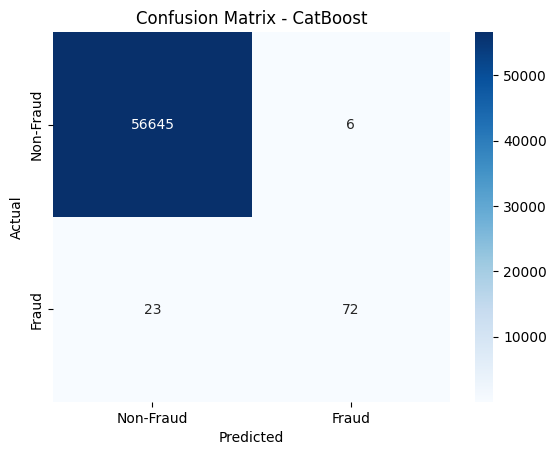

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {model_name}")
plt.show()
